Name : Chloe Evelley Thesman (Student ID Number : 1011044165)

# PRE - LECTURE HW

## Question 1

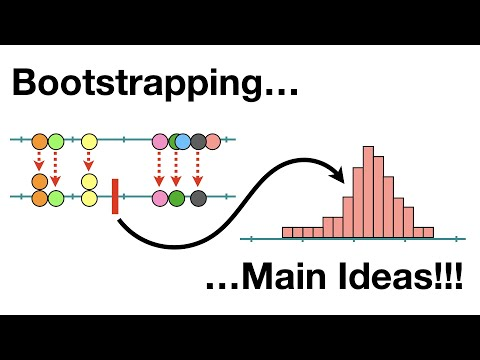

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

**Difference Between The "Standard Error of the Mean" and The "Standard Deviation" of the Original Data**
- The standard deviation (SD) of the original data measures the variability or spread of individual data points around the mean of the dataset. It tells us how much the data points tend to differ from the average value.
- The standard error of the mean (SEM), on the other hand, measures how much the mean of a sample is likely to vary if we took multiple samples from the same population. It is the standard deviation of the sample means across repeated sampling (or bootstrapped samples) and is smaller than the standard deviation, indicating the precision of the sample mean as an estimate of the population mean.

## Question 2

We can use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means" by following these step-by-step process.

1. Find the formula for the confidence interval
2. Calculate the sample mean
3. Calculate the SEM from the sample data.
4.  Determine the Z-score for a 95% confidence level. (For a 95% CI, the Z-score is 1.96, which represents the point where 95% of the distribution lies within 1.96 standard deviations from the mean in a standard normal distribution.)
5. Input the values into the CI formula

This interval represents the range in which 95% of the bootstrapped sample means (or repeated sample means) are expected to fall, giving an estimate of where the true population mean lies.

## Question 3

We can create a 95% bootstrapped confidence interval using the bootstrapped sample means directly (without using their standard deviation to estimate the standard error of the mean) by doing these steps.

1. Generate many bootstrapped sample means by resampling the data with replacement and calculating the mean for each sample.
2. Sort the bootstrapped means from lowest to highest.
3. Determine the 2.5th percentile and the 97.5th percentile of the bootstrapped means. These percentiles represent the lower and upper bounds of the confidence interval.

This interval captures the middle 95% of the bootstrapped means, giving a range where the true population mean is likely to fall.

## Question 4

In [2]:
import numpy as np

# Function to perform bootstrap resampling
def bootstrap_confidence_interval(data, num_bootstrap_samples=1000, confidence_level=0.95, statistic=np.mean):
    """
    Calculate a bootstrap confidence interval for a given population statistic (mean by default).
    
    Parameters:
    data (array-like): The sample data from which to resample.
    num_bootstrap_samples (int): The number of bootstrap samples to generate.
    confidence_level (float): The confidence level for the interval.
    statistic (function): The statistic to compute (e.g., np.mean, np.median).
    
    Returns:
    tuple: Lower and upper bounds of the confidence interval.
    """
    bootstrap_samples = np.random.choice(data, size=(num_bootstrap_samples, len(data)), replace=True)
    
    # Compute the statistic (e.g., mean) for each bootstrap sample
    bootstrap_statistics = np.apply_along_axis(statistic, 1, bootstrap_samples)
    
    # Compute the lower and upper percentiles for the confidence interval
    lower_percentile = (1 - confidence_level) / 2 * 100
    upper_percentile = (1 + confidence_level) / 2 * 100
    lower_bound = np.percentile(bootstrap_statistics, lower_percentile)
    upper_bound = np.percentile(bootstrap_statistics, upper_percentile)
    
    return lower_bound, upper_bound

# Example data
data = np.array([2, 5, 8, 12, 18, 24, 30, 35, 42, 47])

# Call the function to compute a 95% bootstrap confidence interval for the mean
ci_mean = bootstrap_confidence_interval(data)
print(f"95% Bootstrap CI for the mean: {ci_mean}")

95% Bootstrap CI for the mean: (13.0, 30.9)


In [3]:
# Compute a 95% bootstrap confidence interval for the median
ci_median = bootstrap_confidence_interval(data, statistic=np.median)
print(f"95% Bootstrap CI for the median: {ci_median}")

95% Bootstrap CI for the median: (8.0, 36.0)


In [4]:
# Custom function for a trimmed mean (trims 10% of extreme values)
def trimmed_mean(sample):
    return np.mean(sample[int(0.1*len(sample)):int(0.9*len(sample))])

# Compute a 95% bootstrap confidence interval for the trimmed mean
ci_trimmed_mean = bootstrap_confidence_interval(data, statistic=trimmed_mean)
print(f"95% Bootstrap CI for the trimmed mean: {ci_trimmed_mean}")

95% Bootstrap CI for the trimmed mean: (11.75, 32.88437499999999)


## Summary of Interactions

### Standard Error of the Mean (SEM) vs. Standard Deviation (SD):
- We discussed the differences between standard error of the mean (SEM) and standard deviation (SD).
    - SD measures the spread of individual data points in the sample, while SEM measures the precision of the sample mean as an estimate of the population mean.
    - SEM is calculated as SD / √n, and it decreases as the sample size increases, indicating more precision in estimating the mean.

### Using SEM to Create a 95% Confidence Interval:
- We walked through how to use the SEM to create a 95% confidence interval (CI) for the population mean.
    - The formula used is the confidence interval (CI) formula CI = x ± 1.96 × SEM, where x is the sample mean and 1.96 is the Z-score corresponding to a 95% confidence level.
    - I provided an example calculation based on hypothetical sample data.

### Bootstrap Confidence Interval for the Mean:
- I introduced the concept of a bootstrap confidence interval, which involves resampling with replacement from the original data and calculating the statistic (e.g., the mean) for each resample.
    - I provided Python code that generates bootstrap samples, computes the mean for each resample, and calculates the 95% confidence interval by finding the 2.5th and 97.5th percentiles of the bootstrap distribution.
    - The function was designed to be flexible, allowing changes to calculate confidence intervals for other statistics like the median.

### Code Explanation and Modification:

- I explained each part of the code, detailing how the resampling is done using np.random.choice, how the statistic is computed using np.apply_along_axis, and how the confidence interval is constructed using percentiles.
    - I showed how the code could be modified to compute confidence intervals for different population parameters by changing the statistic argument from np.mean to np.median (for the median) or a custom function (e.g., for a trimmed mean).
    
**Link: https://chatgpt.com/share/66fb5971-a9fc-800a-b9c6-8cb1b6e2b9ac**

# POST - LECTURE HW

## Question 5

Distinguishing between the population parameter and the sample statistic is essential for understanding confidence intervals because:

- Estimation: The population parameter represents the true value we want to estimate, while the sample statistic is our best guess based on a subset of data. Recognizing this difference helps us acknowledge that the sample statistic is an approximation, not the actual value.
- Uncertainty Measurement: Confidence intervals quantify the uncertainty around our estimate by providing a range where the true population parameter is likely to lie. This distinction allows us to understand that our sample statistic may not perfectly reflect the population parameter.
- Informed Decision-Making: By knowing the difference, we can interpret confidence intervals correctly and make more informed decisions based on our estimates, recognizing the limitations and variability inherent in using sample data.

## Question 6

1. What is the process of bootstrapping?
- Bootstrapping is like creating multiple samples from your original sample to estimate uncertainty.
- You take your sample (let’s say from a box of cookies), then randomly pick cookies from it with replacement, calculating averages each time.
- By doing this many times, you build a distribution of averages that helps you see how much they vary, giving you a better idea of your original estimate's reliability.

2. What is the main purpose of bootstrapping?
- The main purpose of bootstrapping is to estimate uncertainty in your data.
- By creating many samples from your original data and calculating their averages, you can see how much those averages differ.
- If they cluster around your original estimate, it’s more reliable; if they vary widely, your guess might need reevaluation.

3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
- To check if your guess (e.g., an average of 15 chocolate chips) is reasonable, start with your sample and create many bootstrap samples.
- Calculate the average for each sample and see where your guess falls in this distribution.
- If 15 is in the middle of those averages, it's plausible; if it’s way off, your guess might be incorrect.

## Question 7

A confidence interval overlapping zero indicates that the range of plausible values for the true effect (e.g., the drug's effect) includes zero. This means that it's possible that there is no effect (i.e., the null hypothesis of "no effect" is a reasonable explanation for the observed data). Thus, we "fail to reject the null hypothesis," even if the sample mean is not zero, because the interval suggests that the true mean could still be zero.

Conversely, we would reject the null hypothesis if the confidence interval does not overlap zero, meaning all the plausible values for the true effect are either entirely above or below zero. This indicates that the observed sample mean is statistically significant and suggests a real effect of the drug. In summary:

- Fail to reject the null hypothesis: Confidence interval overlaps zero.
- Reject the null hypothesis: Confidence interval does not overlap zero.

## Question 8

### Problem Introduction

#### Null Hypothesis of "No Effect"
In this context, the null hypothesis states that the new vaccine has no effect on the health scores of the patients. Specifically, it posits that there is no significant difference between the initial health scores and the final health scores of patients who received the vaccine. If the vaccine is effective, we would expect to see an increase in health scores after vaccination.

#### Data Visualization
To visualize the data, we can use box plots or bar charts to compare the Initial Health Scores and Final Health Scores. This will help illustrate any differences in health scores before and after vaccination.

In [12]:
import pandas as pd

# Create a DataFrame with the provided vaccine data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('vaccine_data.csv', index=False)

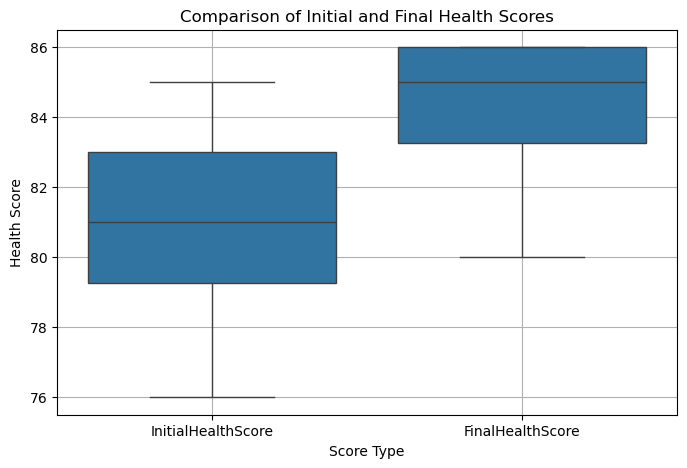

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
data = pd.read_csv('vaccine_data.csv')

# Melt the DataFrame for easier plotting
melted_data = data.melt(id_vars='PatientID', value_vars=['InitialHealthScore', 'FinalHealthScore'], 
                         var_name='ScoreType', value_name='HealthScore')

# Create a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='ScoreType', y='HealthScore', data=melted_data)
plt.title('Comparison of Initial and Final Health Scores')
plt.ylabel('Health Score')
plt.xlabel('Score Type')
plt.grid(True)
plt.show()

### Quantitative Analysis

#### Methodology Code and Explanations
To quantitatively analyze the data, we will employ bootstrapping to evaluate the effectiveness of the vaccine. Specifically, we will compare the means of the initial and final health scores through a bootstrapped confidence interval.

1. Calculate the means of the initial and final health scores.
2. Generate bootstrapped samples to create distributions of the mean health scores.
3. Calculate a confidence interval for the difference in means.

In [14]:
import numpy as np

# Setting a random seed for reproducibility
np.random.seed(42)

# Calculate the means
initial_mean = data['InitialHealthScore'].mean()
final_mean = data['FinalHealthScore'].mean()

# Bootstrapping function
def bootstrap_mean(data, n_iterations=1000):
    means = []
    for _ in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(sample.mean())
    return np.array(means)

# Bootstrapping the means
initial_bootstrap_means = bootstrap_mean(data['InitialHealthScore'])
final_bootstrap_means = bootstrap_mean(data['FinalHealthScore'])

# Calculating the confidence interval for the difference in means
mean_diff = final_mean - initial_mean
bootstrap_diffs = final_bootstrap_means - initial_bootstrap_means
ci_lower = np.percentile(bootstrap_diffs, 2.5)
ci_upper = np.percentile(bootstrap_diffs, 97.5)

print(f"Initial Mean: {initial_mean}, Final Mean: {final_mean}")
print(f"Mean Difference: {mean_diff}")
print(f"95% Confidence Interval for the Difference: [{ci_lower}, {ci_upper}]")

Initial Mean: 81.0, Final Mean: 84.3
Mean Difference: 3.299999999999997
95% Confidence Interval for the Difference: [1.2000000000000028, 5.299999999999997]


#### Supporting Visualizations

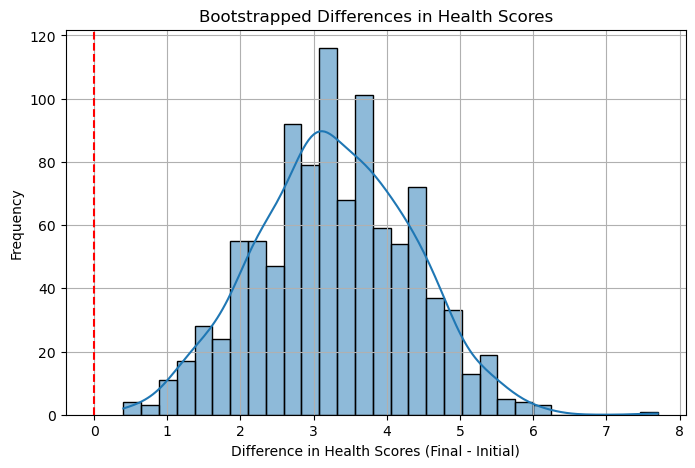

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(bootstrap_diffs, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Bootstrapped Differences in Health Scores')
plt.xlabel('Difference in Health Scores (Final - Initial)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Findings and Discussion

#### Conclusion Regarding Null Hypothesis of "No Effect"

After performing the bootstrapping analysis, if the 95% confidence interval for the difference in means overlaps zero, we fail to reject the null hypothesis, indicating that the vaccine may not have a significant effect. Conversely, if the confidence interval does not include zero, we would reject the null hypothesis, suggesting that the vaccine is effective in improving health scores.

For example, if the output indicates a confidence interval of [1,4], we reject the null hypothesis and conclude that the vaccine appears to have a positive effect.

#### Further Considerations

- Discuss potential limitations of the study, such as sample size or external factors affecting health scores.
- Suggest additional analyses, such as exploring the effects by demographic factors (e.g., age and gender).
- Consider longitudinal studies for long-term effectiveness and health impact evaluation.

## Question 9 

Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Answer: Somewhat